<a href="https://colab.research.google.com/github/gustavo-plc/joinWithPandas/blob/main/join_data_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INNER JOIN

In [ ]:
import pandas as pd

# READING FILES

path1 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/''taxi_owners.p'

taxi_owners = pd.read_pickle(path1)

path2 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/taxi_vehicles.p'

taxi_veh = pd.read_pickle(path2)


# INNER JOIN


# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on = 'vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes = ('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())


# Inner joins and number of rows returned




Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')
Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')
fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# READING FILES

path3 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/ward.p'

wards = pd.read_pickle(path3)

path4 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/census.p'

census = pd.read_pickle(path4)


# Inner joins and number of rows returned: inner joins only return the rows with matching values in both tables.


print(wards.head())
print(census.head())

# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on = 'ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)
print()
#altering wards table
wards_altered = wards
wards_altered.loc[0, ['ward']] = 61

# Print the first few rows of the wards_altered table to view the change
print(wards_altered[['ward']].head())
print()
# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on = 'ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)
print()

# it only printed 49 rows instead of 50 because there was no 50 matching values on both tables, since we altered the ward value to 61

#altering census table

census_altered = census
census_altered.loc[0, ['ward']] = 'none'

# Print the first few rows of the census_altered table to view the change
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on = 'ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

# it only printed 49 rows instead of 50 because there was no 50 matching values on both tables, since we altered the ward value to 61

# Attention: .merge() only returns rows where the values match in both tables.


  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
wards_census table shape: (50, 9)

  ward
0   61
1    2
2    3


In [ ]:
# One-to-many relationships: when one row of Table A can relate to more than one rows of Table B.
# Example: ward 1 can have more than one businesses related to it. It's a one to many relation.


# ONE TO MANY MERGE


import pandas as pd


# READING FILES


path5 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/licenses.p'

licenses = pd.read_pickle(path5)

path6 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/business_owners.p'

biz_owners = pd.read_pickle(path6)

print(licenses.head())
print()
print(biz_owners.head())
print()

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on = 'account')
print(licenses_owners.head())
print()

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})
# this line COUNTS the number of diff ACCOUNTS grouped by TITLE
# THE CAPITAL WORDS SHOWS THE FUNCTION'S ARGUMENTS

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values('account', ascending = False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())


  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613

  account first_name  last_name      title
0      10      PEARL    SHERMAN  PRESIDENT
1      10      PEARL    SHERMAN  SECRETARY
2   10002     WALTER     MROZEK    PARTNER
3   10002     CELINA     BYRDAK    PARTNER
4   10005      IRENE  ROSENFELD  PRESIDENT

  account ward  aid              business              address    zip  \
0  307071    3  743  REGGIE'S BAR & GRILL      2105 S STATE ST  60616   
1      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   
2      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  6

In [ ]:
# Merging multiple DataFrames

import pandas as pd


# READING FILES


path7 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/cta_calendar.p'

cal = pd.read_pickle(path7)

path8 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/cta_ridership.p'

ridership = pd.read_pickle(path8)

path9 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/stations.p'

stations = pd.read_pickle(path9)

print(cal.head())
print()
print(ridership.head())
print()
print(stations.head())
print()


# QUESTION: find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7)

# TO MERGE THREE TABLES:
# df1.merge(df2, on='col') \
#     .merge(df3, on='col')


# merging cal and ridership to have just one table with all this content, since
# almost all columns from cal are already in ridership

# Merge the ridership and cal tables MERGING TWO TABLES!
ridership_cal = ridership.merge(cal, on = ['year', 'month', 'day'])
print(ridership_cal)
print()

# MERGING THREE TABLES AT ONCE!:

ridership_cal_stations = ridership.merge(cal, on = ['year', 'month', 'day']) \
                                  .merge(stations, on = 'station_id')

print(ridership_cal_stations)
print()

# SINCE THE TABLES WERE MERGED WE CAN NOW CREATE A FILTER TO FACILITATE SELECTING DATA FROM THE MERGED TABLE

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['station_name'] == 'Wilson') & (ridership_cal_stations['day_type'] == 'Weekday') & (ridership_cal_stations['month'] == 7))

#printing the sum of these rides on July weekdays on Wilson's station
# synthax: df.loc[lines, columns]

print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())


   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday

  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719

  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)

     station_id  year  month  day  rides        day_type
0         40010  2019      1    1    576  Sunday/Holiday
1         40010  2019      1    2   1457         Weekday
2         40010  2019      1    3 

In [ ]:
# Merging multiple DataFrames

import pandas as pd


# READING FILES


path10 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/licenses.p'

licenses = pd.read_pickle(path10)

path11 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/ward.p'

wards = pd.read_pickle(path11)

path12 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/zip_demo.p'

zip_demo = pd.read_pickle(path12)

print(licenses.head())
print()
print(wards.head())
print()
print(zip_demo.head())
print()


# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
            			.merge(wards, on = 'ward')

# PRINTING THE RESULTS WITHOUT A FILTER_CRITERIA, JUST USING THE GROUPBY AND AGG METHODS

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

# RESULT SHOWING THE INCOME MEDIAN FOR EACH ALDERMAN: CMD ABOVE

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649

     zip  income
0  60630   70122
1  60640   50488
2  60622   87143
3  60614  100116
4  60608   41226

                             income
a

In [ ]:
# One-to-many merge with multiple tables


# PROBLEM: However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell.

import pandas as pd


# READING FILES


path13 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/land_use.p'

land_use = pd.read_pickle(path13)

path14 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/census.p'

census = pd.read_pickle(path14)

path15 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/licenses.p'

licenses = pd.read_pickle(path15)


print(land_use.head())
print()
print(census.head())
print()
print(licenses.head())
print()

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on = 'ward') \
                        .merge(licenses, on = 'ward', suffixes = ('_cen', '_lic'))

print(land_cen_lic.columns)
print()

# Group by ward, pop_2010, and vacant, then count the # of accounts
# AFTER THIS, THE FEATURE ACCOUNT WILL HAVE THE TOTAL NUMBER OF ACCOUNTS FOR EACH WARD

pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'],
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'],
                                             ascending=[False, True, True])
print(sorted_pop_vac_lic.head())
print()

# THE GOAL HERE ABOVE WAS TO FIND A PLACE WITH FEW POPULATION,
# MANY VACANT PLACES AND FEW BUSINESSES (BY THE ACCOUNT N#)



  ward  residential  commercial  industrial  vacant  other
0    1           41           9           2       2     46
1    2           31          11           6       2     50
2    3           20           5           3      13     59
3    4           22          13           0       7     58
4    5           25           3           1       3     68

  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'

# LEFT JOIN

In [ ]:
# Counting missing rows with left join

import pandas as pd


# READING FILES


path16 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/movies.p'

movies = pd.read_pickle(path16)

path17 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/financials.p'

financials = pd.read_pickle(path17)

print(movies.head())
print(movies.shape)
print(financials.head())
print(financials.shape)

# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on = 'id', how = 'left')

# TO DISCOVER HOW MANY LINES ARE MISSING FROM THE SECOND DATAFRAME, JUST CALCULATE
# THE NUMBER OF LINES THAT CONTAINS "NAN" VALUES


# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

# When performing a left join, the .merge() method returns a row full of null values for columns in the right table if the key column does not have a matching value in both tables.

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
(4803, 4)
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08
(3229, 3)
1574


In [ ]:
# Enriching a dataset


import pandas as pd


# READING FILES


path18 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/toy_story.p'

toy_story = pd.read_pickle(path18)

path19 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/taglines.p'

taglines = pd.read_pickle(path19)

print(toy_story)
print()
print(taglines)
print()

# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on = 'id', how = 'left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

# AFTER MERGING, IT WAS POSSIBLE TO NOTICE THAT THERE IS NO TAGLINE INFORMATION ABOUT TOY STORY


# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on = 'id')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

# A LEFT join will return all of the rows of your left table, while using an INNER join may result in lost data if it does not exist in both tables.



      id        title  popularity release_date
0  10193  Toy Story 3      59.995   2010-06-16
1    863  Toy Story 2      73.575   1999-10-30
2    862    Toy Story      73.640   1995-10-30

          id                                            tagline
0      19995                        Enter the World of Pandora.
1        285     At the end of the world, the adventure begins.
2     206647                              A Plan No One Escapes
3      49026                                    The Legend Ends
4      49529               Lost in our world, found in another.
...      ...                                                ...
4795  124606            Sometimes you've got to break the rules
4796   14337                 What happens if it actually works?
4798    9367  He didn't come looking for trouble, but troubl...
4799   72766  A newlywed couple's honeymoon is upended by th...
4801  126186                           A New Yorker in Shanghai

[3955 rows x 2 columns]

      id        t

# OTHER JOINS

    movie_id            genre      id  \
0     211672           Comedy  211672   
1     211672        Adventure  211672   
2     211672        Animation  211672   
3     211672           Family  211672   
4     157336            Drama  157336   
5     157336  Science Fiction  157336   
6     157336        Adventure  157336   
7     293660        Adventure  293660   
8     293660           Action  293660   
9     293660           Comedy  293660   
10    118340        Adventure  118340   
11    118340  Science Fiction  118340   
12    118340           Action  118340   
13     76341           Action   76341   
14     76341  Science Fiction   76341   
15     76341        Adventure   76341   
16     76341         Thriller   76341   
17    135397         Thriller  135397   
18    135397        Adventure  135397   
19    135397           Action  135397   
20    135397  Science Fiction  135397   
21        22          Fantasy      22   
22        22        Adventure      22   
23        22    

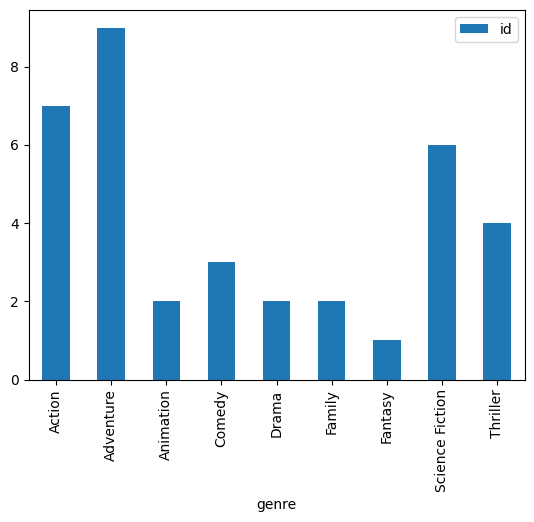

In [ ]:
# Popular genres with right join: What are the genres of the most popular movies?

import pandas as pd
import matplotlib.pyplot as plt


# READING FILES


path20 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/pop_movies.p'

pop_movies = pd.read_pickle(path20)

path21 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/movie_to_genres.p'

movie_to_genres = pd.read_pickle(path21)

# A RIGHT JOIN WAS MADE. THE REFERENCE TABLE WAS MOVIE TO GENRE, BECAUSE IT IS THE ONE THAT IS GOING TO MOVE FOR THE RIGHT.

# THE ROWS FROM THE RIGHT TABLE (POP_MOVIES) WILL REMAIN AND ONLY THE ROWS FROM THE LEFT TABLE (MOVIE_TO_GENRE) THAT MATCHES WITH POP_MOVIES ID WILL REMAIN.

genres_movies = movie_to_genres.merge(pop_movies, left_on = 'movie_id', right_on = 'id', how = 'right')

print(genres_movies)

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})
print(genre_count)

# Plot a bar chart of the genre_count

genre_count.plot(kind='bar')
plt.show()

# SELF JOIN

In [ ]:
# Merging a table to itself can be useful when you want to compare values in a column to other values in the same column

import pandas as pd

# READING FILE


path22 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/crews.p'

crews = pd.read_pickle(path22)

print(crews.head())
print()

# Merge the crews table to itself

crews_self_merged = crews.merge(crews, on = 'id', how = 'inner', suffixes = ('_dir', '_crew'))


# Create a Boolean index to select the appropriate
boolean_filter = (crews_self_merged['job_dir'] == 'Director') &  (crews_self_merged['job_crew'] != 'Director')

direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())



# By merging the table to itself, you compared the value of the __director__ from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in
# the same movie.


      id  department             job               name
0  19995     Editing          Editor  Stephen E. Rivkin
2  19995       Sound  Sound Designer  Christopher Boyes
4  19995  Production         Casting          Mali Finn
6  19995   Directing        Director      James Cameron
7  19995     Writing          Writer      James Cameron

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. May

# MERGING ON INDEXES

In [ ]:
# INDEX MERGE FOR MOVIES RATINGS

import pandas as pd

# READING FILE

path23 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/movies.p'

movies = pd.read_pickle(path23)

path24 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/ratings.p'

ratings = pd.read_pickle(path24)

# KNOWING YOUR DATA

print(movies.head())
print()

print(ratings.head())
print()

movies_ratings = movies.merge(ratings, on = 'id', how = 'left')

print(movies_ratings.head())
print()


      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17

       id  vote_average  vote_count
0   19995           7.2     11800.0
1     285           6.9      4500.0
2  206647           6.3      4466.0
3   49026           7.6      9106.0
4   49529           6.1      2124.0

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote

In [17]:
# Do sequels earn more?

# QUESTION: which movie sequels earned the most compared to the original movie.

import pandas as pd

# READING FILE

path25 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/sequels.p'

sequels = pd.read_pickle(path25)

path26 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/financials.p'

financials = pd.read_pickle(path26)

# KNOWING YOUR DATA

# print(sequels.head())
# print()

# print(financials.head())
# print()

# MERGING DATA

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# MERGING LEFT: ALL MOVIES FROM THE SEQUELS TABLE ARE KEPT.

print(sequels_fin)
print()

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                             right_on='id',
                             suffixes=('_org', '_seq'))


# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

print(orig_seq)
print()


# Select the title_org, title_seq, and diff
titles_diff = orig_seq.loc[:, ['title_org', 'title_seq', 'diff']]

print(titles_diff)
print()


# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending = False).head())

          id                             title  sequel       budget  \
0      19995                            Avatar    <NA>  237000000.0   
1        862                         Toy Story     863   30000000.0   
2        863                       Toy Story 2   10193   90000000.0   
3        597                           Titanic    <NA>  200000000.0   
4      24428                      The Avengers    <NA>  220000000.0   
...      ...                               ...     ...          ...   
4798  133931                          Zambezia    <NA>          NaN   
4799  309503                            Zipper    <NA>          NaN   
4800   34592  ZMD: Zombies of Mass Destruction    <NA>          NaN   
4801  206213                     Zombie Hunter    <NA>          NaN   
4802  185567                              Zulu    <NA>          NaN   

           revenue  
0     2.787965e+09  
1     3.735540e+08  
2     4.973669e+08  
3     1.845034e+09  
4     1.519558e+09  
...            ...  


# **FILTERING JOINS** != Mutating Joins



## *   SEMI JOIN
## *   ANTI JOIN



In [ ]:
# Performing an anti join (files not provided)

# # Merge employees and top_cust
# empl_cust = employees.merge(top_cust, on='srid',
#                                  how='left', indicator=True)

# # Select the srid column where _merge is left_only
# srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# # Get employees not working with top customers
# print(employees[employees['srid'].isin(srid_list)])

In [ ]:
# Performing a semi join (files not provided)

# # # Merge the non_mus_tcks and top_invoices tables on tid
# tracks_invoices = non_mus_tcks.merge(top_invoices, on = 'tid')

# # # Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
# top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# # # Group the top_tracks by gid and count the tid rows
# cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# # # Merge the genres table to cnt_by_gid on gid and print
# print(genres.merge(cnt_by_gid, on = 'gid'))

# Concatenate DataFrames together vertically

# **USING MERGE_ORDERED()**

In [11]:
# Correlation between GDP and S&P500

# READING FILE

import pandas as pd

path27 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/S&P500.csv'

sp500 = pd.read_csv(path27)

path28 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/WorldBank_GDP.csv'

gdp = pd.read_csv(path28)

# KNOWING YOUR DATA

print(sp500.head())
print()

print(gdp.head())
print()

#merging data

gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'Year', right_on = 'Date', how = 'left')

print(gdp_sp500)

# Use merge_ordered() to merge gdp and sp500, and forward fill missing values
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date',
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500.loc[:, ['GDP', 'Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

   Date  Returns
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41

    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12

     Country Name Country Code     Indicator Name  Year           GDP    Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0

# **merge_ordered() caution, multiple columns**

In [17]:
# merge_ordered() caution, multiple columns

# READING FILE

import pandas as pd

path29 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/WorldBank_GDP.csv'

gdp = pd.read_csv(path29)

path30 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/WorldBank_POP.csv'

pop = pd.read_csv(path30)

# KNOWING YOUR DATA

print(gdp.head())
print()

print(pop.head())
print()
print()

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on = ['Year', 'Country Name'], fill_method='ffill')

# Print ctry_date
print(ctry_date)

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
date_ctry = pd.merge_ordered(gdp, pop, on = ['Country Name', 'Year'], fill_method='ffill')

# Print ctry_date
print(date_ctry)

# When you merge on date first, the table is sorted by date then country. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and Sweden for the remainder of the year. This is not what you want. The fill forward is using unintended data to fill in the missing values. However, when you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12

  Country Name Country Code     Indicator Name  Year         Pop
0        Aruba          ABW  Population, total  2010    101669.0
1  Afghanistan          AFG  Population, total  2010  29185507.0
2       Angola          AGO  Population, total  2010  23356246.0
3      Albania          ALB  Population, total  2010   2913021.0
4      Andorra          AND  Population, total  2010     84449.0


            Country Name Country Code_x   Indicator Name_x  Year  \
0            Afghanistan            NaN                NaN  2010   
1                Albania            NaN                Na

# **Using merge_asof()**

# **Subsetting rows with .query()**

In [21]:
# Subsetting rows with .query()

# READING FILE

import pandas as pd

path31 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/WorldBank_GDP.csv'

gdp = pd.read_csv(path31)

path32 = '/content/drive/MyDrive/Colab Notebooks/Join Data with Pandas/Datasets/WorldBank_POP.csv'

pop = pd.read_csv(path32)

# KNOWING YOUR DATA

print(gdp.head())
print()

print(pop.head())
print()
print()

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on = ['Year', 'Country Name'])


    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12

  Country Name Country Code     Indicator Name  Year         Pop
0        Aruba          ABW  Population, total  2010    101669.0
1  Afghanistan          AFG  Population, total  2010  29185507.0
2       Angola          AGO  Population, total  2010  23356246.0
3      Albania          ALB  Population, total  2010   2913021.0
4      Andorra          AND  Population, total  2010     84449.0


